<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/workbook_14_gaussian_mixture_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title #Quiz

%%html
<link   rel="stylesheet" href="https://fbeilstein.github.io/machine_learning/js_common/styles.css"/>
<script src="https://fbeilstein.github.io/machine_learning/js_common/script.js"></script>
<script>
load_quiz_from("https://fbeilstein.github.io/machine_learning/lecture_14_gaussian_mixture_models/quiz_1.txt")
</script>

#GMM in 1D

In [ ]:
#@title Gaussian Mixture
import IPython
from google.colab import output


main_str = '''
<html>

<head>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>

  <script type="application/javascript">
    var xs = [];
    var ys = [];
    var x_min = -5.0;
    var y_min =  0.0;
    var x_max = +5.0;
    var y_max = +0.8;
    for (var x = x_min; x <= x_max; x += 0.01)
      xs.push(x);
    for (var y = y_min; y <= y_max; y += 0.1)
      ys.push(y);
    var colors = ['blue', 'green', 'red'];
    var coefs = [1.0/3.0, 1.0/3.0, 1.0/3.0];
    var rand_pts = [];

   function random_point(mu, sigma) {
     var z = Math.sqrt(-2.0 * Math.log(Math.random())) * Math.cos(2.0 * Math.PI * Math.random());
     return z * sigma + mu;
   }

    function loss_function_2d() {
      var canvas = document.getElementById("paint");
      var w = canvas.width;
      var h = canvas.height;

      //var size = adjust_canvas();
      //var w = size[0];
      //var h = size[1];

      mu = [];
      sigma = [];
      C = Math.sqrt(2 * Math.PI);
      for (var i = 0; i < pts.length; ++i) {
          var x = pts[i][0] / w * (x_max - x_min) + x_min;
        var y = (1.0 - pts[i][1] / h) * (y_max - y_min) + y_min;
          mu.push(x);
          sigma.push(1.0 / (y * C));
      }

      data = [];
      for (var trace_idx = 0; trace_idx < pts.length; ++trace_idx) {
          var trace = [];
          for (var i = 0; i < xs.length; ++i) {
              var delta = (xs[i] - mu[trace_idx]) / sigma[trace_idx];
              trace.push(Math.exp(-delta*delta / 2.0) / sigma[trace_idx] / C);
          }
          data.push({
            x: xs,
            y: trace,
            showscale: false,
            opacity: coefs[trace_idx],
            type: 'scatter',
            mode: 'line',
            name: 'gaussian ' + trace_idx,
            line: {
              width: 2,
              color: colors[trace_idx]
            },
          });
      }

      var sum_trace = [];
      for (var i = 0; i < xs.length; ++i) {
          var sum = 0.0;
          for (var trace_idx = 0; trace_idx < pts.length; ++trace_idx) {
              var delta = (xs[i] - mu[trace_idx]) / sigma[trace_idx];
              sum += coefs[trace_idx] * Math.exp(-delta*delta / 2.0) / sigma[trace_idx] / C;
          }
          sum_trace.push(sum);
      }
      data.push({
            x: xs,
            y: sum_trace,
            showscale: false,
            opacity: coefs[trace_idx],
            type: 'scatter',
            mode: 'line',
            name: 'sum',
            line: {
              width: 2,
              color: 'black'
            },
          });

      var N_points = 200;
      rand_pts = [];
      var ys = [];
      for (var i = 0; i < N_points; ++i) {
        active_gaussian = 0;
        var rnd = Math.random();
        if (rnd > coefs[0])
            active_gaussian = 1;
        if (rnd > coefs[0] + coefs[1])
            active_gaussian = 2;
        //active_gaussian = Math.floor(Math.random() * Math.floor(3));
        rand_pts.push(random_point(mu[active_gaussian], sigma[active_gaussian]));
        ys.push(0.0);
      }
      data.push({
            x: rand_pts,
            y: ys,
            showscale: false,
            opacity: 1.0,
            type: 'scatter',
            mode: 'markers',
            name: 'random datapoints',
            marker: {
              symbol: 'line-ns',
              size: 20,
              line :{
                width: 1,
                color: 'black'
              }
            }
          });

      var cell_for_plot = document.getElementById("for_right_plot");
      var layout = {
          //title: 'Error Function',
          xaxis: {'range': [x_min, x_max], 'domain': [0.0, 1.0], 'fixedrange': true},
          yaxis: {'range': [y_min, y_max], 'domain': [0.0, 1.0], 'fixedrange': true},
          width: 800,
          height: 500,
          autosize: false,
          showlegend: true,
          margin: {
            l: 50,
            r: 50,
            b: 50,
            t: 50
          }
        };
      Plotly.newPlot(cell_for_plot, data, layout);
    }

    var pts = [[100, 300], [300, 300], [500, 300]];
    var active_idx = -1;

    function mdown_handle(event) {
      //console.log('down');
      event.stopPropagation();
      x = event.offsetX;
      y = event.offsetY;
      for (var i = 0; i < pts.length; ++i)
        if ((x - pts[i][0])*(x - pts[i][0]) + (y - pts[i][1])*(y - pts[i][1]) < 500)
            active_idx = i;
      //console.log('ACTIVE', active_idx);
    }

    function mmove_handle(event) {
      event.stopPropagation();
      //console.log('move');
      if (active_idx < 0)
          return;
      pts[active_idx] = [event.offsetX, event.offsetY];
      loss_function_2d();
    }

    function mup_handle(event) {
      active_idx = -1;
    }

    async function call_once() {
      //const result = await google.colab.kernel.invokeFunction('notebook.redraw', [coefs, mu, sigma, rand_pts], {});
      //const text = result.data['application/json'];
    }
    var old_state = false;
    function adjust_canvas() {
      var plt_div = document.getElementById('for_right_plot');
      var el = plt_div.getElementsByClassName('xy')[0];
      if (!el)
          return [600, 600];
      var rect = el.getBoundingClientRect();
      var canvas = document.getElementById("paint");
      //console.log(rect);
      canvas.style.cssText = "position:absolute; top:" + parseInt(rect.top)
                          + "px; left: " + parseInt(rect.left)
                          + "px; width:" + parseInt(rect.width)
                          + "px; height:" + parseInt(rect.height)
                          + "px; z-index:1000;";
      canvas.width = rect.width;
      canvas.height = rect.height;
      var ctx = canvas.getContext('2d');
      ctx.clearRect(0, 0, canvas.width, canvas.height);

      if ((canvas.offsetParent === null) != old_state)
        call_once();
      old_state = (canvas.offsetParent === null);

      //loss_function_2d();
      return [canvas.width, canvas.height];
    }

    function draw_slider() {
        var canvas = document.getElementById("slider");
        var ctx = canvas.getContext('2d');
        var h = canvas.height;
        var w = canvas.width;
        var cur_start = 0;
        ctx.clearRect(0, 0, canvas.width, canvas.height);
        for (var i = 0; i < pts.length; ++i) {
            ctx.fillStyle = colors[i];
            ctx.fillRect(0, cur_start, w, h*coefs[i]);
            cur_start += h*coefs[i];
        }

    }

    var active_coef = -1;
    function mdown(event) {
    //console.log('ddd');
      event.stopPropagation();
      x = event.offsetX;
      y = event.offsetY;
      var canvas = document.getElementById("slider");
      var h = canvas.height;
      var H = 0;
      for (var i = 0; i < coefs.length - 1; ++i) {
        H += coefs[i] * h;
        if (y > H - 10 && y < H +1)
            active_coef = i;
      }
      //console.log(active_coef, coefs);
    }

    function mmove(event) { // for double-slider only
      event.stopPropagation();
      if (active_coef < 0)
        return;
      x = event.offsetX;
      y = event.offsetY;
      var canvas = document.getElementById("slider");
      var h = canvas.height;
      var new_sum = y / h;
      if (active_coef == 0) {
        if (coefs[0] + coefs[1] < new_sum)
            coefs[1] = 0.0;
        else
            coefs[1] = coefs[0] + coefs[1] - new_sum;
        coefs[0] = new_sum;
        coefs[2] = 1.0 - coefs[0] - coefs[1];
      }
      if (active_coef == 1) {
        if (coefs[0] > new_sum)
            coefs[0] = new_sum;
        coefs[1] = new_sum - coefs[0];
        coefs[2] = 1.0 - coefs[0] - coefs[1];
      }
      draw_slider();
      loss_function_2d();
    }

    function mup(event) {
      active_coef = -1;
    }


  </script>
</head>

<body>

<canvas id="paint" width=600 height=600
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)">
</canvas>

<canvas id="slider" width=40 height=250
    onmousedown="mdown(event)"
    onmousemove="mmove(event)"
    onmouseup="mup(event)"
    style="position:absolute;left:700px;top:250px;width:40px;height:250px;z-index:1000;">
</canvas>


<div id="everything" style="height:600px; width:600px;">
  <div id="for_right_plot">
  </div>
</div>




</body>

<script>
function init()
{
  loss_function_2d();
  adjust_canvas();
  loss_function_2d();
  setInterval(adjust_canvas, 1000);
  draw_slider();
}
init();
</script>

</html>
'''


display(IPython.display.HTML(main_str))
#output.register_callback('notebook.redraw', redraw)





#GMM in 2D

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def cluster(X, n):
  gmm2 = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
  gmm2.fit(X)
  y_kmeans = gmm2.predict(X)
  centers = gmm2.means_
  covs = gmm2.covariances_
  w = gmm2.weights_
  return y_kmeans, centers, covs, w

In [ ]:
#@title GMM for 2D points
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Ellipse
from matplotlib import cm

def draw_ellipse(position, covariance, ax, **kwargs):
    """Draw an ellipse with a given position and covariance"""

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_clusters(X, y, center, covariances, weights):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  cmap = cm.get_cmap('viridis')
  c_norm = len(center)
  plt.scatter(X[:, 0], X[:, 1], c=y/c_norm, s=50)
  plt.scatter(center[:, 0], center[:, 1], c='red', marker='x', s=200, alpha=0.5);

  w_factor = 0.2 / weights.max()
  for pos, covar, w, c in zip(center, covariances, weights, range(c_norm)):
    clr = 0.5 if c_norm <= 1 else c/(c_norm-1)
    draw_ellipse(pos, covar, ax, alpha=w * w_factor, fc=cmap(clr))

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64


def get_surface_data(centers, covs, w):
  x_ = np.linspace(-1.0, +1.0, num=300)
  y_ = np.linspace(-1.0, +1.0, num=300)
  xx, yy = np.meshgrid(x_, y_)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()])) - centers[:, np.newaxis]
  prod_1 = np.array([np.dot(v,m) for v,m in zip(x_vec, np.linalg.inv(covs))])
  prod_2 = np.array([np.sum(v1*v2, axis=1) for v1,v2 in zip(prod_1, x_vec)])
  g = np.exp(-0.5 * prod_2) / np.sqrt(np.linalg.det(covs).shape) / 2.0 / np.pi
  g = g.reshape((g.shape[0], x_.shape[0], y_.shape[0]))
  G = np.sum(g*w[:,np.newaxis, np.newaxis], axis=0)
  C = np.argmax(g, axis=0)
  return x_, y_, G, C

import json
from IPython.display import display, clear_output

def invoke(pts, n):
  global html_div

  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0

  y_kmeans, centers, covs, w = cluster(X, int(n))
  if(len(covs.shape)) == 2:
    covs = np.array([[[cov[0], 0.0], [0.0, cov[1]]] for cov in covs])
  if(len(covs.shape)) == 1:
    covs = np.array([[[cov, 0.0], [0.0, cov]] for cov in covs])

  figr = plot_clusters(X, y_kmeans, centers, covs, w)
  image_base64 = figure_to_base64(figr)

  x_, y_, G, C = get_surface_data(centers, covs, w)

  return IPython.display.JSON({'image': image_base64,
                               'g_x': x_.tolist(), 'g_y': y_.tolist(), 'g_z': G.tolist(), 'g_c': C.tolist(),
                               's_x': X[:, 0].tolist(), 's_y': X[:, 1].tolist(), 's_z': [0]*len(X), 's_c': y_kmeans.tolist()})


import IPython
from google.colab import output

main_str = '''
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
  <script type="application/javascript">

    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }

    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(50, 50, 50, 0.2)';
      ctx.fill();
    }


    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });

      }
    }

    var timer

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }


    function mdown_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }

    function mmove_handle(evt) {
      evt.stopPropagation();
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }

    function mup_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    function clear_field() {
      active_pt = null;
      all_pts = [];
    }


   function plot_3d(g_x, g_y, g_z, g_c)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     //Plotly.deleteTraces(cell_for_plot, [0, 1]);
     var data = [{
           x: g_x,
           y: g_y,
           z: g_z,
           type: 'surface',
           surfacecolor: g_c,
           opacity: 0.9,
           showscale: false,
           colorscale: "Viridis"
        }];

     var layout = {
          title: '3D Gaussian profile',
          autosize: false,
          width: 600,
          height: 600,
          showlegend: false,
          scene: {
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
     Plotly.newPlot(cell_for_plot, data, layout);
   }

   function plot_scatter(s_x, s_y, s_z, s_c)
   {

     cell_for_plot = document.getElementById('for_plotly_plot');
     var data = [{
           x: s_x,
           y: s_y,
           z: s_z,
           type: 'scatter3d',
           mode: 'markers',
           marker: {
             size: 4,
             colorscale: "Viridis",
             color: s_c,
             line: {
               width: 2,
               color: 'rgba(0, 0, 0, 0.5)'
             }
           }
        }];
    Plotly.plot(cell_for_plot, data, {});
   }


    var cur_depth = 1;

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged, cur_depth], {});
      params = result.data['application/json'];

      bg_image.src = 'data:image/  png;base64,' + params.image;
      cell_for_plot = document.getElementById('for_plotly_plot');

      plot_3d(params.g_x, params.g_y, params.g_z, params.g_c);
      plot_scatter(params.s_x, params.s_y, params.s_z, params.s_c);

    }

   function h_change(x) {
    el = document.getElementById("slider_val");
    cur_depth = x;
    el.innerHTML = x;
  }

 </script>

<div id="everything" style="height:600px;">
<div id="for_plotly_plot" style="position:absolute; top:0px; left:0px; height:600px; width:600px;">
</div>
<div id="custom_controls" style="position:absolute; top:0px; left:600px;">
  <canvas id="canvas" width="800" height="600"
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked">
    <label for="r1">Add data point</label>
    <br>
    <input type="radio" id="r2" name="rate" value="move">
    <label for="r2">Move data point</label>
    <br>
    <input type="radio" id="r3" name="rate" value="del">
    <label for="r3">Delete data point</label>
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>Number of clusters:<br>
    <input type="range" min="1" max="9" value="1" oninput="h_change(this.value)">
    <br><div id="slider_val">1</div>
   <br><br>
    <button type="button" onclick="calculate();">
      GMM
    </button>
  </div>
</div>
<div>

<script>
function init()
{
  timer = setInterval(draw, 10);
}

init();
</script>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.InvSVM', invoke)

#Implement simple GMM

---

**GMM algorithm**

---

`1. Initialize ` $\theta=\{\pi_k, \mu_k, \Sigma_k\}$.

`2. Compute log-likelihood ` $L=\log{p(X|\theta)}=\sum_{i=1}^N \log\left(\sum_{k=1}^K \pi_k \, \mathcal{N}({x_i}|\mu_k, \Sigma_k)\right)$.

`3. Repeat until convergence: `

$\qquad$ `Set responsibility: `

$$
a_{ik}=\frac{\pi_k \, p(x_i|\theta_k)}{\sum_{k=1}^K \pi_k \, p(x_i|\theta_k)}.
$$

$\qquad$ `Update parameters: `

$$
\begin{aligned}
& \mu_k=\frac{\sum_{i=1}^N a_{ik}x_i}{\sum_{i=1}^N a_{ik}} ,\\
& \Sigma_k=\frac{\sum_{i=1}^N a_{ik}(x_i-\mu_k)(x_i-\mu_k)^{\top}}{\sum_{i=1}^N a_{ik}} ,\\
& \pi_k=\frac{\sum_{i=1}^N a_{ik}}{N}.
\end{aligned}
$$

$\qquad$ `Recompute log-likelihood L.`

---

<br>

In [ ]:
# a very basic implementation of GMM
from sklearn.metrics import pairwise_distances_argmin
import numpy as np


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def cluster(X, initial_centers, initial_covs, callback):
  n = len(initial_centers)
  w = np.ones(n) / n # set intial weights equal
  c = initial_centers
  S = initial_covs
  old_c = c * 100.0 # just make sure we enter cycle
  iter_num = 0
  # NOTE:
  # Due to input limitations I use
  # c for centers -- mu in formulas
  # w for weights -- pi in formulas
  # S for covariance matrices -- capital sigma in formulas

  while (not np.allclose(old_c.ravel(), c.ravel(), rtol=0.01)) and iter_num < 20: # you can add more iterations if you want
    iter_num += 1
    # callback
    callback(c, S, w)
    # Set responsibility, i.e. calculate aik here
    # ENTER YOUR CODE HERE
    aik =

    # Update parameters
    # ENTER YOUR CODE HERE
    old_c = c
    c =
    S =
    w =

In [ ]:
#@title Solution (double-click to see the code)

# a very basic implementation of GMM
from sklearn.metrics import pairwise_distances_argmin
import numpy as np


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def cluster(X, initial_centers, initial_covs, callback):
  n = len(initial_centers)
  w = np.ones(n) / n # set intial weights equal
  c = initial_centers
  S = initial_covs
  old_c = c * 100.0 # just make sure we enter cycle
  iter_num = 0

  while (not np.allclose(old_c.ravel(), c.ravel(), rtol=0.01)) and iter_num < 20: # you can add more iterations if you want
    iter_num += 1
    # callback
    callback(c, S, w)
    # preparation
    x = X - c[:, np.newaxis]
    e = np.einsum('ijf,ijf->ij', np.einsum('fij,fkj->fki', np.linalg.inv(S), x), x)
    p = np.exp(-0.5 * e) / np.sqrt(np.linalg.det(S)[:,np.newaxis]) /  (2.0 * np.pi)
    aik = p * w[:, np.newaxis]
    aik /= np.sum(aik, axis=0)

    # parameters update
    w_ = np.sum(aik, axis=1)
    w_[w_ < 1E-7] += 1E-6
    old_c = c
    c = np.einsum('ij,jk->ik', aik, X) / w_[:,np.newaxis]
    x = X - c[:, np.newaxis]
    x_xt = np.einsum('kin,kim->kinm', x, x)
    S = np.einsum('ki,kinm->knm', aik, x_xt) / w_[:,np.newaxis,np.newaxis]
    dets = np.abs(np.linalg.det(S))
    S[dets < 1E-5] += 1E-5 * np.array([[1,0],[0,1]])
    w = w_ / np.sum(w_)

In [ ]:
#@title GMM on custom 2D dataset


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin
from matplotlib.patches import Ellipse


def draw_ellipse(position, covariance, ax, **kwargs):
  U, s, Vt = np.linalg.svd(covariance)
  angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
  width, height = 2 * np.sqrt(s)

  # Draw the Ellipse
  for nsig in range(1, 4):
    ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def prepare_colors(N):
  cmap = cm.get_cmap('viridis')
  colors = []
  for c in range(N):
    clr = 0.5 if N <= 1 else c/(N-1)
    colors.append(cmap(clr))
  return np.array(colors)

def plot_clusters(X, y, center, covariances, weights, colors, Z, xy_3d):
  #sns.set();
  sns.set_style("whitegrid")
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  ax.scatter(X[:, 0], X[:, 1], c=colors[y], s=150)
  # see https://matplotlib.org/3.1.1/api/markers_api.html
  ax.scatter(center[:, 0], center[:, 1], c=colors, marker='s', s=200);

  # fit the estimator
  xx, yy = np.meshgrid(xy_3d, xy_3d)
  #Z = pairwise_distances_argmin(np.c_[xx.ravel(), yy.ravel()], center)

  # Put the result into a color plot
  n_classes = len(center)
  #Z = Z.reshape(xx.shape)
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap='viridis', zorder=1)

  w_factor = 0.2 / weights.max()
  for pos, covar, w, c in zip(center, covariances, weights, colors):
    draw_ellipse(pos, covar, ax, alpha=w * w_factor, fc=c)

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64

def get_lines(X, centers, labels):
  classes = np.unique(labels)
  lines = []
  for c in classes:
    from_pts = centers[c]
    to_pts = X[labels == c]
    for p in to_pts:
      lines = lines + [from_pts, p, np.array([None, None])]
  return np.array(lines)

import json
from IPython.display import display, clear_output

history = []
def collect_history(centers, covs, w):
  global history
  history += [[centers, covs, w]]

def pts_to_params(pts):
  data_points = []
  centers = []
  cov_matrices = []
  for p in pts:
    if p[2] == 0:
      data_points.append(np.array([p[0]/300.0 - 1.0, -(p[1]/300.0 - 1.0)]))
    if p[2] == 1:
      c = np.array([p[0]/300.0 - 1.0, -(p[1]/300.0 - 1.0)])
      centers.append(c)
      a = np.array([p[3]/300.0 - 1.0, -(p[4]/300.0 - 1.0)])
      b = np.array([p[5]/300.0 - 1.0, -(p[6]/300.0 - 1.0)])
      u = a - c
      v = b - c
      cov_matrices.append(np.array([[u[0] * u[0] + v[0] * v[0], u[0] * u[1] - v[0] * v[1]],
                                    [u[0] * u[1] - v[0] * v[1], u[1] * u[1] + v[1] * v[1]]]))
  return np.array(data_points), np.array(centers), np.array(cov_matrices)

def params_to_pts(data_pts, centers, covs):
  pts = []
  data_pts[:, 1] *= -1.0
  data_pts = (data_pts + 1.0) * 300.0
  for p in data_pts:
    pts.append([p[0], p[1], 0])
  for c,p in zip(covs, centers):
    U, s, Vt = np.linalg.svd(c)
    a, b = np.sqrt(s)
    u = U.dot(np.array([a, 0])) + p
    v = U.dot(np.array([0, b])) + p
    p[1] *= -1.0
    p = (p + 1.0) * 300.0
    u[1] *= -1.0
    u = (u + 1.0) * 300.0
    v[1] *= -1.0
    v = (v + 1.0) * 300.0
    pts.append([p[0], p[1], 1, u[0], u[1], v[0], v[1], 0])
  return pts

def explode_history():
  centers_history = []
  covs_history = []
  weights_history = []
  for c, v, w in history:
    centers_history.append(c)
    covs_history.append(v)
    weights_history.append(w)
  centers_history = np.array(centers_history)
  covs_history = np.array(covs_history)
  weights_history = np.array(weights_history)
  return centers_history, covs_history, weights_history

def get_paths(centers, covs, scale):
  command_list = []
  for c,v in zip(centers, covs):
    U, s, Vt = np.linalg.svd(v)
    #angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = np.sqrt(s) * scale

    T = Vt.dot(np.array([[width, 0], [0, height]]))
    R = np.array([[0, 1], [-1, 0]])

    A = np.array([np.sqrt(2.0) / 2.0,  np.sqrt(2.0) / 2.0])
    B = np.array([np.sqrt(2.0) / 2.0, -np.sqrt(2.0) / 2.0])
    a = np.array([(8.0 - np.sqrt(2.0)) / 6.0, (7.0 - 8.0 / np.sqrt(2)) / 3.0])
    b = np.array([(8.0 - np.sqrt(2.0)) / 6.0,-(7.0 - 8.0 / np.sqrt(2)) / 3.0])

    command  = 'M {},{} '.format((T.dot(A) + c)[0], (T.dot(A) + c)[1])
    for _ in range(4):
      command += 'C {},{} {},{} {},{}'.format((T.dot(a) + c)[0], (T.dot(a) + c)[1],
                                              (T.dot(b) + c)[0], (T.dot(b) + c)[1],
                                              (T.dot(B) + c)[0], (T.dot(B) + c)[1])
      B, a, b = R.dot(B), R.dot(a), R.dot(b)
    command += ' Z'
    command_list.append(command)

  return command_list

def get_path_history(centers_h, covs_h):
  full_history = []
  for centers, covs in zip(centers_h, covs_h):
    full_history.append([get_paths(centers, covs, 1), get_paths(centers, covs, 2), get_paths(centers, covs, 3)])
  return full_history

def colors_as_rgb(colors):
  result = []
  for c in colors:
    result.append('rgb({},{},{})'.format(int(c[0]*255), int(c[1]*255), int(c[2]*255)))
  return result

def labels_to_colors(labels, colors):
  return np.array(colors)[labels]

def weights_to_alpha_history(weights):
  pass
  #print(weights)

def get_surface_data(centers, covs, w, x_vec, s):
  x = x_vec - centers[:, np.newaxis]
  e = np.einsum('ijf,ijf->ij', np.einsum('fij,fkj->fki', np.linalg.inv(covs), x), x)
  g = np.exp(-0.5 * e) / np.sqrt(np.linalg.det(covs)[:,np.newaxis]) / (2.0 * np.pi)
  G = np.sum(g*w[:,np.newaxis], axis=0).reshape((s,s))
  C = np.argmax(g, axis=0).reshape((s,s))
  return G, C

def recover_labels_history(X):
  labels_history = []
  for c, covs, w in history:
    x = X - c[:, np.newaxis]
    e = np.einsum('ijf,ijf->ij', np.einsum('fij,fkj->fki', np.linalg.inv(covs), x), x)
    g = np.exp(-0.5 * e) / np.sqrt(np.linalg.det(covs)[:,np.newaxis]) / (2.0 * np.pi)
    #prod_1 = np.array([np.dot(v,m) for v,m in zip(x_vec, np.linalg.inv(covs))])
    #prod_2 = np.array([np.sum(v1*v2, axis=1) for v1,v2 in zip(prod_1, x_vec)])
    #g = np.exp(-0.5 * prod_2) / np.sqrt(np.linalg.det(covs).shape) / 2.0 / np.pi
    labels_history.append(np.argmax(g*w[:,np.newaxis], axis=0))
  return np.array(labels_history)


def get_surface_history(centers_hist, covs_hist, w_hist, colors, xy_3d):
  xx, yy = np.meshgrid(xy_3d, xy_3d)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()]))
  surf_hist = []
  for c,v,w in zip(centers_hist, covs_hist, w_hist):
    G, C = get_surface_data(c, v, w, x_vec, xy_3d.shape[0])
    #cols = labels_to_colors(C, colors_as_rgb(colors))
    surf_hist.append([G.tolist(), C.tolist()])#cols.tolist()])
  return surf_hist


def invoke(pts):
  global history
  history = []
  X, i_C, M = pts_to_params(pts)

  cluster(X, i_C, M, collect_history)

  labels_history = recover_labels_history(X)
  centers_history, covs_history, weights_history = explode_history()
  paths_history = get_path_history(centers_history, covs_history)

  colors = prepare_colors(len(i_C))

  connections_history = [get_lines(X, c, l) for c,l in zip(centers_history, labels_history)]
  connections_X = [c[:, 0].tolist() for c in connections_history]
  connections_Y = [c[:, 1].tolist() for c in connections_history]

  c_x = [[c[0] for c in center] for center in centers_history]
  c_y = [[c[1] for c in center] for center in centers_history]

  xy_3d = np.linspace(-1.0, +1.0, num=200)
  surf_hist = get_surface_history(centers_history, covs_history, weights_history, colors, xy_3d)

  figr = plot_clusters(X, labels_history[-1],
                       centers_history[-1], covs_history[-1],
                       weights_history[-1], colors,
                       surf_hist[-1][1], xy_3d)
  image_base64 = figure_to_base64(figr)

  updated_pts = params_to_pts(X.copy(), centers_history[-1], covs_history[-1])
  #print(labels_to_colors(labels_history, colors_as_rgb(colors)))
  ops = weights_to_alpha_history(weights_history)

  #print("X ", X.shape, " conn ", np.array(connections_history).shape, " centers ", centers_history.shape)
  #print(surf_hist[0][1])

  return IPython.display.JSON({'image': image_base64,
                               'new_pts': updated_pts,
                               'labels_history': labels_to_colors(labels_history, colors_as_rgb(colors)).tolist(),
                               'conn_x_hist': connections_X,
                               'conn_y_hist': connections_Y,
                               'conn_z_hist': np.zeros((centers_history.shape[0], connections_history[0].shape[0])).tolist(),
                               'pts_x': X[:, 0].tolist(),
                               'pts_y': X[:, 1].tolist(),
                               'pts_z': np.zeros(X.shape[0]).tolist(),
                               'c_x': c_x,
                               'c_y': c_y,
                               'c_z': np.zeros((centers_history.shape[0], centers_history.shape[1])).tolist(),
                               'ellipses': paths_history,
                               'colors': colors_as_rgb(colors),
                               'surface': surf_hist,
                               'xy3d': xy_3d.tolist()})


import IPython
from google.colab import output

main_str = '''
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
  <script type="application/javascript">

    var active_pt = null;
    var all_pts = [];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }

    function circ(ctx, pos) {
      ctx.beginPath();
      if (pos[2] == 0) {
      	  ctx.fillStyle = 'rgba(128, 128, 128, 0.5)';
          ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
          ctx.fill();
      } else {
      	  ctx.fillStyle = 'rgba(128, 128, 128, 0.5)';
          ctx.fillRect(pos[0] - ptR, pos[1] - ptR, 2 * ptR, 2 * ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 1.0)';
          ctx.fillRect(pos[3] - ptR/2, pos[4] - ptR/2, ptR, ptR);
          ctx.fillRect(pos[5] - ptR/2, pos[6] - ptR/2, ptR, ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 0.1)';
          var rx = Math.sqrt((pos[4] - pos[1])*(pos[4] - pos[1]) + (pos[3] - pos[0])*(pos[3] - pos[0]));
          var ry = Math.sqrt((pos[6] - pos[1])*(pos[6] - pos[1]) + (pos[5] - pos[0])*(pos[5] - pos[0]));
          ctx.ellipse(pos[0], pos[1], rx, ry, Math.atan2(pos[4] - pos[1], pos[3] - pos[0]), 0, Math.PI * 2.0);
          ctx.fill();
      }
    }


    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');

        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field

        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);

        if (active_pt) {
          circ(ctx, active_pt);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, item);
        });

      }
    }

    var timer

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }


    function mdown_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y, 0]);
        return;
      }
      if (state == "addC") {
        if (x < 600)
            all_pts.push([x, y, 1, x + 20, y, x, y + 20, 0]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
          if (item[2] == 1)
          	item[7] = 0;
        }
        if (item[2] == 1 && is_close([x,y], [item[3], item[4]])) {
        	item[7] = 1;
        	idx = index;
        }
        if (item[2] == 1 && is_close([x,y], [item[5], item[6]])) {
        	item[7] = 2;
        	idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }

    function mmove_handle(evt) {
      evt.stopPropagation();
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
      	if (active_pt[2] == 0) {
      		active_pt[0] = x;
        	active_pt[1] = y;
      	}
        if (active_pt[2] == 1) {
        	if (active_pt[7] == 0) {
            	active_pt[3] += x - active_pt[0];
            	active_pt[4] += y - active_pt[1];
            	active_pt[5] += x - active_pt[0];
            	active_pt[6] += y - active_pt[1];
            	active_pt[0] = x;
        		active_pt[1] = y;
            }
            if (active_pt[7] == 1) {
            	active_pt[3] = x;
            	active_pt[4] = y;
            	var v_x = active_pt[3] - active_pt[0];
            	var v_y = active_pt[4] - active_pt[1];
            	var r = Math.sqrt(v_x*v_x + v_y*v_y);
            	var u_x = active_pt[5] - active_pt[0];
            	var u_y = active_pt[6] - active_pt[1];
            	var R = Math.sqrt(u_x*u_x + u_y*u_y);
            	active_pt[5] = active_pt[0] - v_y / r * R;
            	active_pt[6] = active_pt[1] + v_x / r * R;
            }
            if (active_pt[7] == 2) {
            	active_pt[5] = x;
            	active_pt[6] = y;
            	var v_x = active_pt[3] - active_pt[0];
            	var v_y = active_pt[4] - active_pt[1];
            	var r = Math.sqrt(v_x*v_x + v_y*v_y);
            	var u_x = active_pt[5] - active_pt[0];
            	var u_y = active_pt[6] - active_pt[1];
            	var R = Math.sqrt(u_x*u_x + u_y*u_y);
            	active_pt[3] = active_pt[0] + u_y / R * r;
            	active_pt[4] = active_pt[1] - u_x / R * r;

            }
        }

      }
    }

    function mup_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }

    function clear_field() {
      active_pt = null;
      all_pts = [];
    }


function plot_history(labels, ctr_x, ctr_y, conns_x, conns_y, p_x, p_y, ellipses, colors) {
cell_for_plot = document.getElementById('for_plotly_plot');

steps_data = [];
frame_data = [];
idx_s = []
for (var k = 0; k < labels.length; k++) {
  steps_data.push({'args': [[k], {
                                    'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': true},
                                    'transition': {'duration': 0, 'easing': 'linear'},
                                    'fromcurrent': false
                                 }
                           ],
                   'label': k,
                   'method': 'animate'
                 }
               );
  idx_s.push(k);
  //prepare shapes
  shape_data = [];
  for (var s_c = 0; s_c < ellipses[k][0].length; s_c++)
  {
     shape_data.push({'type': 'path', 'xref': 'x', 'yref': 'y',
                      'path': ellipses[k][0][s_c],
                      'opacity': 0.5, 'fillcolor': colors[s_c], 'line': {'color': colors[s_c]}
                     });
     shape_data.push({'type': 'path', 'xref': 'x', 'yref': 'y',
                      'path': ellipses[k][1][s_c],
                      'opacity': 0.3, 'fillcolor': colors[s_c], 'line': {'color': colors[s_c]}
                     });
     shape_data.push({'type': 'path', 'xref': 'x', 'yref': 'y',
                      'path': ellipses[k][2][s_c],
                      'opacity': 0.1, 'fillcolor': colors[s_c], 'line': {'color': colors[s_c]}
                     });
  }
  //end prepare
  frame_data.push({'name': k,
         'data': [
            {'type': 'scatter', 'name': 's2', 'x': p_x, 'y': p_y, 'mode': 'markers',
             'marker': {'size': 4, 'color': labels[k]}
            },
            {'type': 'scatter', 'name': 's2', 'x': ctr_x[k], 'y': ctr_y[k], 'mode': 'markers',
             'marker': {'size': 15, 'color': colors}
            },
            {'type': 'scatter', 'name': 's2', 'x': conns_x[k], 'y': conns_y[k],
             'mode': 'lines', 'line': {'color': 'rgb(0,0,0)', 'width': 1}, 'opacity': 0.2
            }
         ], // data
         'layout': {
            'shapes': shape_data
         } // layout
      });
}
just_data = [
            {'type': 'scatter', 'name': 's2', 'x': p_x, 'y': p_y, 'mode': 'markers',
             'marker': {'size': 4, 'color': labels[0]}
            },
            {'type': 'scatter', 'name': 's2', 'x': ctr_x[0], 'y': ctr_y[0], 'mode': 'markers',
             'marker': {'size': 15, 'color': colors, 'symbol': 'square'}
            },
            {'type': 'scatter', 'name': 's2', 'x': conns_x[0], 'y': conns_y[0],
             'mode': 'lines', 'line': {'color': 'rgb(0,0,0)', 'width': 1}, 'opacity': 0.2
            }
];

  shape_data_ini = [];
  for (var s_c = 0; s_c < ellipses[0][0].length; s_c++)
  {
     shape_data_ini.push({'type': 'path', 'xref': 'x', 'yref': 'y',
                      'path': ellipses[0][0][s_c],
                      'opacity': 0.5, 'fillcolor': colors[s_c], 'line': {'color': colors[s_c]}
                     });
     shape_data_ini.push({'type': 'path', 'xref': 'x', 'yref': 'y',
                      'path': ellipses[0][1][s_c],
                      'opacity': 0.3, 'fillcolor': colors[s_c], 'line': {'color': colors[s_c]}
                     });
     shape_data_ini.push({'type': 'path', 'xref': 'x', 'yref': 'y',
                      'path': ellipses[0][2][s_c],
                      'opacity': 0.1, 'fillcolor': colors[s_c], 'line': {'color': colors[s_c]}
                     });
  }


   var layout = {
        width: 600, height: 600, autosize: false,
        showlegend: false,
        xaxis1: {'domain': [0.0, 1.0], 'range': [-1.0, 1.0]},
        yaxis1: {'domain': [0.0, 1.0], 'range': [-1.0, 1.0]},
        title: 'Simplest GMM, 2D view',
        margin: {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        updatemenus: [{'buttons': [{'args': [idx_s,
                                              {'frame': {'duration': 500.0, 'redraw': true},
                                               'fromcurrent': false, 'transition': {'duration': 0, 'easing': 'linear'}
                                              }
                                            ],
                                    'label': 'Play',
                                    'method': 'animate'
                                   },
                                   {'args': [[null], {'frame': {'duration': 0, 'redraw': true},
                                                      'mode': 'immediate',
                                                      'transition': {'duration': 0}
                                                     }
                                            ],
                                    'label': 'Pause',
                                    'method': 'animate'
                                   }
                                  ],
                       'direction': 'left',
                       'pad': {'r': 10, 't': 85},
                       'showactive': true,
                       'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'
                      }
                    ],
        sliders: [{'yanchor': 'top',
                   'xanchor': 'left',
                   'currentvalue': {'font': {'size': 16}, 'prefix': 'Step: ', 'visible': true, 'xanchor': 'right'},
                   'transition': {'duration': 0.0},
                   'pad': {'b': 10, 't': 50},
                   'len': 0.9,
                   'x': 0.1,
                   'y': 0,
                   'steps': steps_data
                   }
                  ],
//shape here
        shapes: shape_data_ini
    };

Plotly.newPlot(cell_for_plot, {data: just_data, frames: frame_data, layout: layout});
   }



function plot_3d_history(labels, ctr_x, ctr_y, ctr_z, conns_x, conns_y, conns_z, p_x, p_y, p_z, colors, surface, xy3d) {
cell_for_plot = document.getElementById('for_plotly_3d_plot');

steps_data = [];
frame_data = [];
idx_s = []
for (var k = 0; k < labels.length; k++) {
  steps_data.push({'args': [[k], {
                                    'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': true},
                                    'transition': {'duration': 0, 'easing': 'linear'},
                                    'fromcurrent': false
                                 }
                           ],
                   'label': k,
                   'method': 'animate'
                 }
               );
  idx_s.push(k);
  frame_data.push({'name': k,
         'data': [
            {'type': 'scatter3d', 'name': 's2', 'x': p_x, 'y': p_y, 'z': p_z,
             'mode': 'markers', 'marker': {'size': 4, 'color': labels[k]}
            },
            {'type': 'scatter3d', 'name': 's2', 'x': ctr_x[k], 'y': ctr_y[k], 'z': ctr_z[k],
             'mode': 'markers', 'marker': {'size': 15, 'color': colors}
            },
            {'type': 'scatter3d', 'name': 's2', 'x': conns_x[k], 'y': conns_y[k], 'z': conns_z[k],
             'mode': 'lines', 'line': {'color': 'rgb(0,0,0)', 'width': 1}, 'opacity': 0.2
            },
            {'type': 'surface', 'name': 'f2', 'x': xy3d, 'y': xy3d, 'z': surface[k][0], 'opacity': 0.8, 'showscale': false, 'surfacecolor': surface[k][1], 'colorscale': 'Viridis'},
         ], // data
      });
}
just_data = [
            {'type': 'scatter3d', 'name': 's2', 'x': p_x, 'y': p_y, 'z': p_z,
             'mode': 'markers', 'marker': {'size': 4, 'color': labels[0], 'line': {'width': 2, 'color': 'rgba(0, 0, 0, 0.5)' }}
            },
            {'type': 'scatter3d', 'name': 's2', 'x': ctr_x[0], 'y': ctr_y[0], 'z': ctr_z[0],
             'mode': 'markers', 'marker': {'size': 15, 'color': colors, 'line': {'width': 2, 'color': 'rgba(0, 0, 0, 0.5)' }}
            },
            {'type': 'scatter3d', 'name': 's2', 'x': conns_x[0], 'y': conns_y[0], 'z': conns_z[0],
             'mode': 'lines', 'line': {'color': 'rgb(0,0,0)', 'width': 1}, 'opacity': 0.2
            },
            {'type': 'surface', 'name': 'f2', 'x': xy3d, 'y': xy3d, 'z': surface[0][0], 'opacity': 0.8, 'showscale': false, 'surfacecolor': surface[0][1], 'colorscale': 'Viridis'},
];
   var layout = {
        width: 600, height: 600, autosize: false,
        showlegend: false,
        scene: {'domain': { 'x': [0, 1], 'y': [0, 1] } },
        //xaxis1: {'domain': [0.0, 1.0], 'range': [-1.0, 1.0]},
        //yaxis1: {'domain': [0.0, 1.0], 'range': [-1.0, 1.0]},
        title: 'Simplest GMM, 3D view',
        margin: {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        updatemenus: [{'buttons': [{'args': [idx_s,
                                              {'frame': {'duration': 500.0, 'redraw': true},
                                               'fromcurrent': false, 'transition': {'duration': 0, 'easing': 'linear'}
                                              }
                                            ],
                                    'label': 'Play',
                                    'method': 'animate'
                                   },
                                   {'args': [[null], {'frame': {'duration': 0, 'redraw': true},
                                                      'mode': 'immediate',
                                                      'transition': {'duration': 0}
                                                     }
                                            ],
                                    'label': 'Pause',
                                    'method': 'animate'
                                   }
                                  ],
                       'direction': 'left',
                       'pad': {'r': 10, 't': 85},
                       'showactive': true,
                       'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'
                      }
                    ],
        sliders: [{'yanchor': 'top',
                   'xanchor': 'left',
                   'currentvalue': {'font': {'size': 16}, 'prefix': 'Step: ', 'visible': true, 'xanchor': 'right'},
                   'transition': {'duration': 0.0},
                   'pad': {'b': 10, 't': 50},
                   'len': 0.9,
                   'x': 0.1,
                   'y': 0,
                   'steps': steps_data
                   }
                  ],
    };

Plotly.newPlot(cell_for_plot, {data: just_data, frames: frame_data, layout: layout});
   }


    async function calculate() {
      if (!all_pts)
        return;
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [all_pts], {});
      params = result.data['application/json'];

      bg_image.src = 'data:image/  png;base64,' + params.image;

      all_pts = params.new_pts;
      active_pt = null;

      //debug_txt = params.ellipses[0][0];

      plot_history(params.labels_history, params.c_x, params.c_y, params.conn_x_hist, params.conn_y_hist, params.pts_x, params.pts_y, params.ellipses, params.colors);
      plot_3d_history(params.labels_history, params.c_x, params.c_y, params.c_z, params.conn_x_hist, params.conn_y_hist, params.conn_z_hist, params.pts_x, params.pts_y, params.pts_z, params.colors, params.surface, params.xy3d);
    }

 </script>

<style>
/* Style the tab */
.tab {
  overflow: hidden;
  border: 1px solid #ccc;
  background-color: #f1f1f1;
}

/* Style the buttons that are used to open the tab content */
.tab button {
  background-color: inherit;
  float: left;
  border: none;
  outline: none;
  cursor: pointer;
  padding: 14px 16px;
  transition: 0.3s;
}

/* Change background color of buttons on hover */
.tab button:hover {
  background-color: #ddd;
}

/* Create an active/current tablink class */
.tab button.active {
  background-color: #ccc;
}

</style>

<script>
function switch_tab(evt, close, open) {
  e_o = document.getElementById(open);
  e_c = document.getElementById(close);
  e_o.style.display = 'block';
  e_c.style.display = 'none';
  tablinks = document.getElementsByClassName("tablinks");
  for (i = 0; i < tablinks.length; i++) {
    tablinks[i].className = tablinks[i].className.replace(" active", "");
  }
  evt.currentTarget.className += " active";
}
</script>

<div class="tab">
  <button class="tablinks active" onclick="switch_tab(event, 'for_plotly_3d_plot', 'for_plotly_plot')">2D plot</button>
  <button class="tablinks" onclick="switch_tab(event, 'for_plotly_plot', 'for_plotly_3d_plot')">3D plot</button>
</div>
<div id="everything" style="height:600px;">
<div id="for_plotly_plot" style="position:absolute; top:50px; left:0px; height:600px; width:600px; display:block;">
</div>
<div id="for_plotly_3d_plot" style="position:absolute; top:50px; left:0px; height:600px; width:600px; display:none;">
</div>
<div id="custom_controls" style="position:absolute; top:50px; left:600px;">
  <canvas id="canvas" width="800" height="600"
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:200px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add data point
    <br>
    <input type="radio" id="r0" name="rate" value="addC"> Add cluster center
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move/Adjust cov's
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>
    <button type="button" onclick="calculate();">
      Clusterize
    </button>
  </div>
</div>
</div>

<script>
function init()
{
  timer = setInterval(draw, 10);
}

init();
</script>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.InvSVM', invoke)

#Old Faithful geyser

Old Faithful is a cone geyser located in Yellowstone National Park in Wyoming, United States. It was named in 1870 and was the first geyser in the park to receive a name.


![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_14_gaussian_mixture_models/old_faithful_geyser.png)

It is a highly predictable geothermal feature. The time between eruptions has a bimodal distribution, with the mean interval being either 65 or 91 minutes, and is dependent on the length of the prior eruption. Within a margin of error of ±10 minutes, Old Faithful will erupt either 65 minutes after an eruption lasting less than ​2 1⁄2 minutes, or 91 minutes after an eruption lasting more than ​2 1⁄2 minutes.

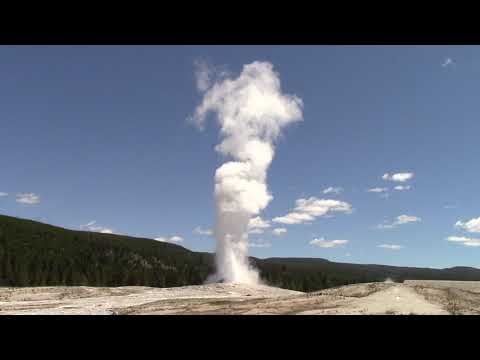

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('sNrWpRceoNo', width=600, height=400, start=20, end=100)

Here is the dataset of waiting time between eruptions and the duration of the eruption for the Old Faithful geyser. A data frame contains 272 observations on 2 variables:
* eruptions (numeric) -  eruption time in mins;
* waiting(numeric) -  waiting time to next eruption.

**Preparation**

Download the dataset in a `csv` format from github.
Following code should do the job.

In [ ]:
# download the dataset
!wget https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/old_faithful.csv

**Problem 1**

Use pandas to load the `old_faithful.csv` file.
Complete the `read_dataframe()` function so that it returns DataFrame constructed from the `old_faithful.csv` file.
Start the "Visualize table" (uses `read_dataframe()` function) code to see what data it contains.

In [ ]:
import pandas as pd

def read_dataframe():
  # ENTER YOUR CODE HERE

In [ ]:
#@title Visualize table
from google.colab import data_table
data_table.DataTable(read_dataframe(), include_index=False, num_rows_per_page=10)

**Problem 2**

Plot 'eruptions' vs 'waiting' scatter plot with `matplotlib`.
See if there is any pattern in the data.
Can GMM find any clusters here?
If yes, how many clusters is it reasonble to search for?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ENTER YOUR CODE HERE

**Problem 3**

Do GMM on the Old Faithful.
You should implement `get_all_data()` function that returns datapoints `X`, their classes `y`, centers of gaussians `centers`, $2\times 2$ covariance matrices `covs`, and weights `w`.

**Note:** for you not to be confused with formats of the output I have added "dummy output" that has appropriate array shapes.
Be sure to conform to the given sample output format.

In [ ]:
from sklearn.mixture import GaussianMixture

def get_all_data():
  # ENTER YOUR CODE HERE
  X = np.array([[2.0, 50], [2.0, 60], [2.5, 60], [4.0, 80], [4.5, 80], [4.5, 70]])
  y = np.array([1, 1, 1, 0, 0, 0])
  centers = np.array([[4.3, 76.7], [2.2, 56.7]])
  covs = np.array([[[0.06, -0.6],
                    [-0.6, 22.2]],
                   [[0.06, 0.6],
                    [0.6, 22.2]]])
  w = np.array([0.5, 0.5])
  return X, y, centers, covs, w

In [ ]:
#@title Visualize GMM
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Ellipse
from matplotlib import cm

def draw_ellipse(position, covariance, ax, **kwargs):
    """Draw an ellipse with a given position and covariance"""

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_clusters(X, y, center, covariances, weights):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.set_xlim([np.min(X[:,0]), np.max(X[:,0])])
  ax.set_ylim([np.min(X[:,1]), np.max(X[:,1])])
  plt.axis('off')

  cmap = cm.get_cmap('viridis')
  c_norm = len(center)
  plt.scatter(X[:, 0], X[:, 1], c=y/c_norm, s=50)
  plt.scatter(center[:, 0], center[:, 1], c='red', marker='x', s=200, alpha=0.5);

  w_factor = 0.2 / weights.max()
  for pos, covar, w, c in zip(center, covariances, weights, range(c_norm)):
    clr = 0.5 if c_norm <= 1 else c/(c_norm-1)
    draw_ellipse(pos, covar, ax, alpha=w * w_factor, fc=cmap(clr))

  plt.close(fig)

  return fig

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from scipy.optimize import minimize


def get_surface_data(centers, covs, w, r):
  x_ = np.linspace(r[0], r[1], num=300)
  y_ = np.linspace(r[2], r[3], num=300)
  xx, yy = np.meshgrid(x_, y_)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()])) - centers[:, np.newaxis]
  prod_1 = np.array([np.dot(v,m) for v,m in zip(x_vec, np.linalg.inv(covs))])
  prod_2 = np.array([np.sum(v1*v2, axis=1) for v1,v2 in zip(prod_1, x_vec)])
  g = np.exp(-0.5 * prod_2) / np.sqrt(np.linalg.det(covs).shape) / 2.0 / np.pi
  g = g.reshape((g.shape[0], x_.shape[0], y_.shape[0]))
  G = np.sum(g*w[:,np.newaxis, np.newaxis], axis=0)
  C = np.argmax(g, axis=0)
  return x_, y_, G, C

def do_visuals():
  X, y_kmeans, centers, covs, w = get_all_data()
  x_min, x_max = np.min(X[:,0]), np.max(X[:,0])
  y_min, y_max = np.min(X[:,1]), np.max(X[:,1])
  x_, y_, G, C = get_surface_data(centers, covs, w, [x_min, x_max, y_min, y_max])

  import base64
  import io

  figr = plot_clusters(X, y_kmeans, centers, covs, w)
  buf = io.BytesIO()
  figr.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = u'data:image/  png;base64,' + base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()


  fig = dict(
      layout = dict(
          width=1200, height=600, autosize=False,
          showlegend = False,
          scene = {'domain': { 'x': [0.0, 0.44], 'y': [0, 1] } },
          xaxis1 = {'domain': [0.55, 1], 'range': [x_min, x_max]},
          yaxis1 = {'domain': [0.0, 1.0], 'range': [y_min, y_max]},
          title  = 'GMM for old and faithful',
          margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
          images = [{'source' : image_base64,
                    'xref': 'x', 'yref': 'y',
                    'sizing': 'stretch',
                    'sizex': x_max - x_min, 'sizey': y_max - y_min,
                    'layer': 'below', 'opacity':1.0,
                    'x': x_min, 'y': y_max}]
      ),
      data = [
          {'type': 'scatter3d', 'name': 's3', 'x': X[:,0], 'y': X[:,1], 'z': np.zeros(X.shape[0]),
          'mode': 'markers', 'marker': {'size': 4, 'colorscale': 'Viridis', 'color': y_kmeans,
                                        'line': {'width': 2, 'color': 'rgba(0, 0, 0, 0.5)' }
                                        }},
          {'type': 'surface', 'name': 'f2', 'x': x_, 'y': y_, 'z': G, 'opacity': 0.8, 'showscale': False, 'surfacecolor': C, 'colorscale': 'Viridis'},
          #{'type': 'contour', 'name': 'c1', 'x':x_, 'y':y_, 'z':z_, 'contours': {'showlabels': True}},
          #{'type': 'scatter', 'name': 's2', 'x': _x, 'y': _y, 'line': {'color': 'red', 'width': 2}

      ]
  )

  #plot(fig, auto_open=False)
  f = go.Figure(fig)
  f.show()

do_visuals()